# Data Cleaning Process

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import tools.helpers as th
import tools.data_preparation as dp
import tools.data_visualization as dv

In [2]:
# LOAD DATA WITH INITIAL CLEAN
df = pd.read_csv('data/kc_house_data.csv')
final_df = dp.initial_clean(df)

In [3]:
new_cat_names = {
    'date': 'recently_sold',
    'bedrooms': 'high_bed',
    'bathrooms': 'high_bath',
    'floors': 'single_floor',
    'view': 'been_viewed',
    'condition': 'good_condition',
    'grade': 'high_grade',
    'sqft_basement': 'has_basement',
    'yr_built': 'age_at_sale',
    'yr_renovated': 'recently_renovated',
    
}

In [4]:
# 'date' column to 'year_sold'
final_df['date'] = final_df['date'].map(lambda x: x.year)

In [5]:
# 'yr_built' to 'age_at_sale'
final_df['yr_built'] = final_df['date'] - final_df['yr_built']

In [6]:
# add 'recently_sold' column
final_df['date'] = np.where(final_df['date'] == 2014, 0, 1)

In [7]:
# 'bedrooms' to 'high_bed', since 3 is most common value
final_df['bedrooms'] = np.where(final_df['bedrooms'] < 3, 0, 1)

In [8]:
# 'bathrooms' to 'high_bath', since 2.5 is most common value
final_df['bathrooms'] = np.where(final_df['bathrooms'] < 2.5, 0, 1)

In [9]:
# 'floors' to 'single_floor', since 1 is most common value
final_df['floors'] = np.where(final_df['floors'] == 1, 0, 1)

In [10]:
# 'view' to 'been_viewed'
final_df['view'] = np.where(final_df['view'] == 0, 0, 1)

In [11]:
# 'condition' to 'good_condition'
final_df['condition'] = np.where(final_df['condition'] < 3, 0, 1)
# MINMAX ??

In [12]:
# 'grade' to 'high_grade'
final_df['grade'] = np.where(final_df['grade'] < 7, 0, 1)

In [13]:
# 'sqft_basement' to 'has_basement'
final_df['sqft_basement'] = np.where(final_df['sqft_basement'] == 0, 0, 1)

In [14]:
# 'yr_renovated' to 'recently_renovated', ie renovated after 2000
final_df['yr_renovated'] = np.where(final_df['yr_renovated'] < 2000, 0, 1)

In [15]:
final_df.rename(columns=new_cat_names, inplace=True)

In [16]:
# # LOG TRANSFORM and STANDARDIZE
# cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
# th.log_transform(final_df, cols)
# th.normalize(final_df, cols)

In [9]:
drop_cols = [
    'sqft_living15',
    'sqft_lot15',
    'zipcode',
    'lat',
    'long',
]

In [10]:
X = final_df.drop(drop_cols, axis=1)
y = final_df['l_price']

th.predictor_corrs(X)

,cc
pairs,


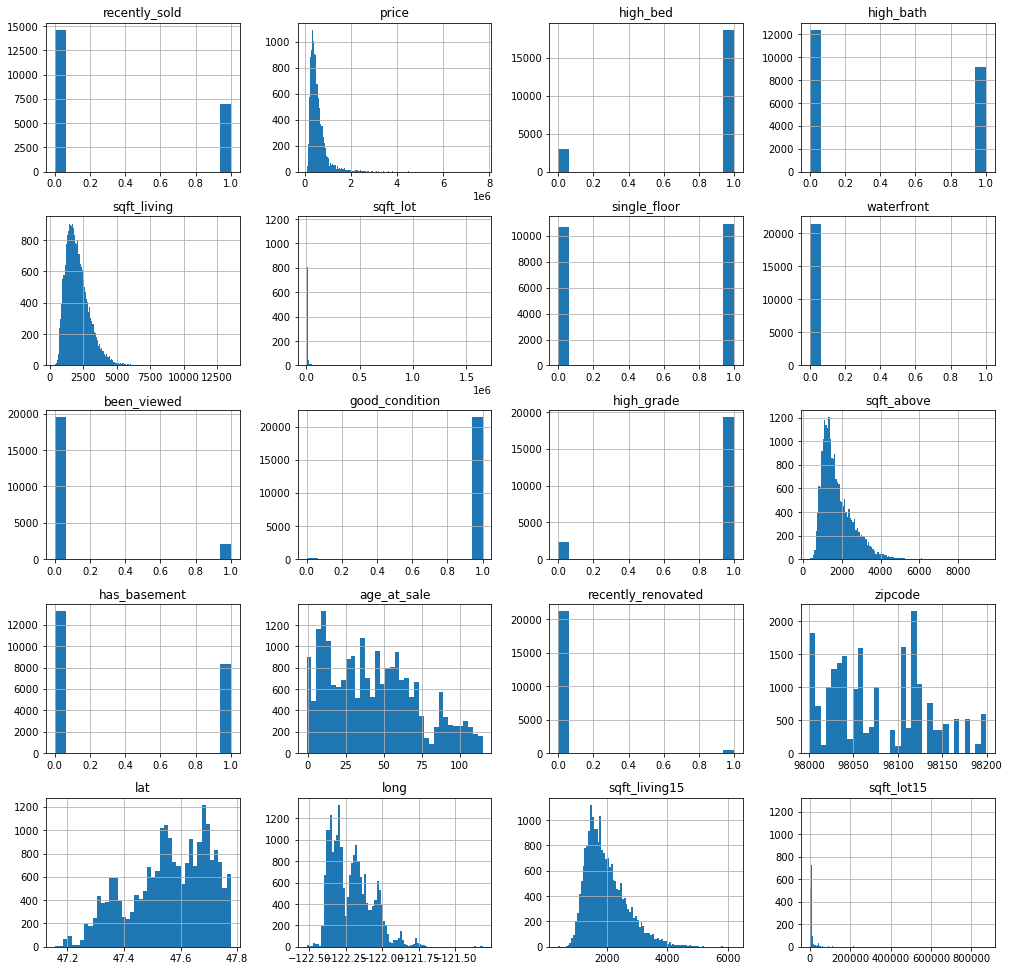

In [17]:
final_df.hist(figsize=(17, 17), bins='auto');

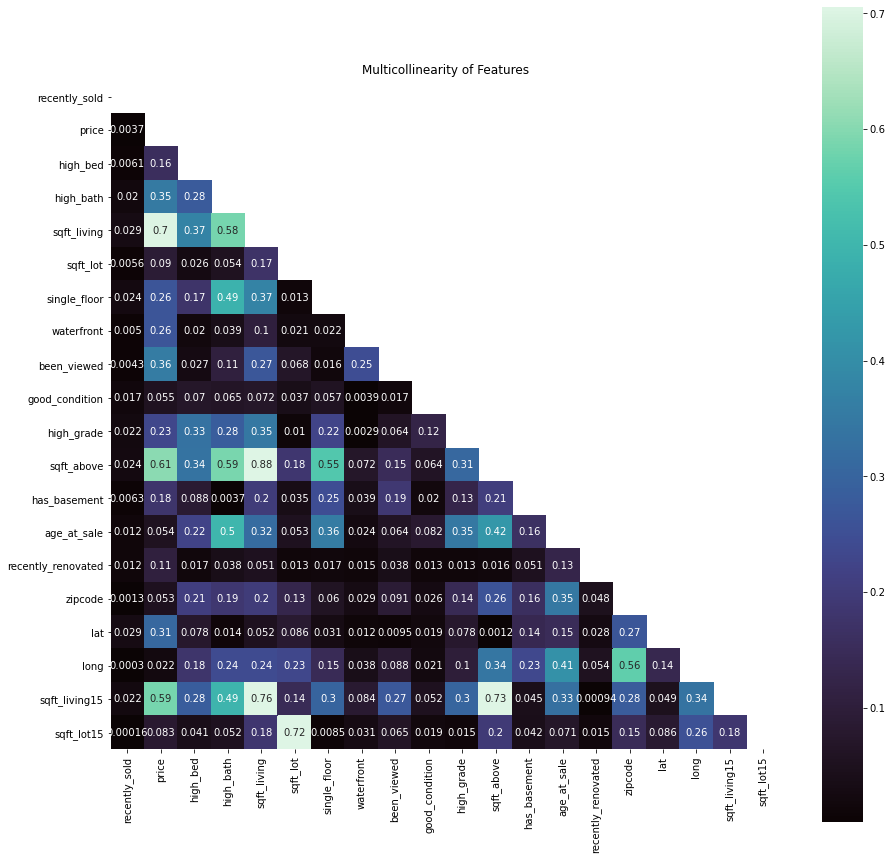

In [18]:
dv.corr_heatmap(final_df)

In [ ]:
def target_scatterplots(X, y)
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

    for ax, column in zip(axes.flatten(), df.columns):
        ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
        ax.set_title(f'Sale Price vs {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Sale Price in $100,000')

    fig.tight_layout()

In [19]:
th.predictor_corrs(final_df, 0.50)

TypeError: predictor_corrs() takes 1 positional argument but 2 were given

In [11]:
X.corrwith(y).sort_values(ascending=False)

l_sqft_living         0.674802
lat                   0.448837
high_grade            0.349526
been_viewed           0.329030
single_floor          0.323580
has_basement          0.209097
high_bed              0.199822
waterfront            0.170720
recently_renovated    0.098864
good_condition        0.093919
long                  0.050862
recently_sold         0.004972
zipcode              -0.038788
age_at_sale          -0.080499
dtype: float64

In [11]:
#MULTIPLE LINEAR REGRESSION (ALL)

formula='l_price~' + '+'.join(X.columns)
model = smf.ols(formula, sm.add_constant(final_df)).fit()
model.summary()

NameError: name 'X' is not defined

In [ ]:
#MULTIPLE LINEAR REGRESSION
subset = 


## Handling Missing Values

#### Exploring incomplete features

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [13]:
# LOG TRANSFORM AND NORMALIZE ALL
log_df = df.copy()['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built']
log_transform(log_df, log_df.columns)
normalize(log_df, log_df.columns)

